# Svetovno prebivalstvo

Projekt pri Programiranju 1 z namenom analize rasti prebivalstva glede na rast GDP.

## Priprava

Začnemo z nalaganjem paketa pandas in razpredelnic, ki jih ustvarimo z ustvari_cvs.py. Podatki so v .txt obliki pridobljeni s strani https://www.cia.gov/library/publications/resources/the-world-factbook/.

In [5]:
import pandas as pd

pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

GDP = pd.read_csv('csv-datoteke/GDP_na_prebivalca.csv', index_col='drzava')
GDP_rast = pd.read_csv('csv-datoteke/GDP_rast.csv', index_col='drzava')
populacija_rast = pd.read_csv('csv-datoteke/rast_populacije.csv', index_col='drzava')
populacija = pd.read_csv('csv-datoteke/populacija.csv', index_col='drzava')

In [2]:
%matplotlib inline

## Analiza 

Najprej bom izračunala povprečne vrednosti GDP, rasti GDP ter rasti prebivalstva.

In [7]:
povprecne = pd.concat([GDP.mean(1), GDP_rast.mean(1), populacija_rast.mean(1), populacija.mean(1)], axis=1, join='inner')
povprecne = povprecne.rename(columns={1: 'Rast GDP', 2: 'Rast populacije', 0: 'GDP', 3: 'Populacija'})

povprecne = povprecne.sort_values(by='GDP')
povprecne

,GDP,Rast GDP,Rast populacije,Populacija
drzava,,,,
"Congo, Democratic Republic of the",450,6.6300,2.78750,71216379.3
Burundi,530,3.9500,3.30875,9682276.3
Somalia,600,2.5800,2.11250,9879251.6
Liberia,680,7.1300,2.74125,3665171.7
Central African Republic,810,1.3600,1.98000,4831638.2
Malawi,820,5.8100,2.80500,15458715.7
Niger,840,7.3000,3.38375,15510196.2
Eritrea,870,3.6700,2.44125,5780391.0
Zimbabwe,930,-0.2700,2.91375,12483062.0


In [8]:
povprecne.corr()

,GDP,Rast GDP,Rast populacije,Populacija
GDP,1.000000,-0.139324,-0.257231,-0.034029
Rast GDP,-0.139324,1.000000,0.206691,0.052049
Rast populacije,-0.257231,0.206691,1.000000,-0.008880
Populacija,-0.034029,0.052049,-0.008880,1.000000


Vidimo lahko, da je, če gledamo povprečne vrednosti, korelacija med rastjo populacije ter rastjo GDP majhna. Poglejmo, če bodo vrednosti različne, če izračunamo korelacijo med rastjo GDP in rastjo prebivalstva le za 10 držav z največjim in 10 držav z najmanjšim GDP.

In [9]:
najmanjsi = povprecne.head(10)
najmanjsi.corr()

,GDP,Rast GDP,Rast populacije,Populacija
GDP,1.000000,-0.369443,-0.021202,-0.462641
Rast GDP,-0.369443,1.000000,0.438877,0.341195
Rast populacije,-0.021202,0.438877,1.000000,0.172717
Populacija,-0.462641,0.341195,0.172717,1.000000


In [10]:
najvecji = povprecne.tail(10)
najvecji.corr()

,GDP,Rast GDP,Rast populacije,Populacija
GDP,1.000000,0.383846,0.399256,-0.330758
Rast GDP,0.383846,1.000000,0.592676,-0.171395
Rast populacije,0.399256,0.592676,1.000000,-0.154708
Populacija,-0.330758,-0.171395,-0.154708,1.000000


V teh primerih je korelacija že večja, vendar to najverjetneje vseeno ni najboljši pokazatelj dejanskega stanja, zato si izberimo nekaj držav in za vsako izmed njih podrobneje analiziranjmo odvisnost rasti prebivalstva od rasti GDP.

In [16]:
kongo = pd.concat([GDP.loc['Congo, Democratic Republic of the'], 
                   GDP_rast.loc['Congo, Democratic Republic of the'], 
                   populacija_rast.loc['Congo, Democratic Republic of the'],
                   populacija.loc['Congo, Democratic Republic of the']
                  ], axis=1) 
kongo.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
kongo.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,0.475617,-0.628132,-0.122356
Rast GDP,0.475617,1.000000,-0.606987,0.272725
Rast prebivalstva,-0.628132,-0.606987,1.000000,-0.884903
Prebivalstvo,-0.122356,0.272725,-0.884903,1.000000


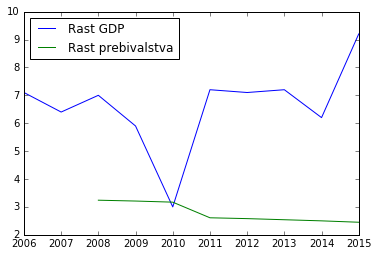

In [54]:
kongo[['Rast GDP', 'Rast prebivalstva']].plot()

In [17]:
niger = pd.concat([GDP.loc['Niger'], 
                   GDP_rast.loc['Niger'], 
                   populacija_rast.loc['Niger'],
                   populacija.loc['Niger']
                  ], axis=1) 
niger.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
niger.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,0.066954,-0.278831,-0.061801
Rast GDP,0.066954,1.000000,0.201563,0.413791
Rast prebivalstva,-0.278831,0.201563,1.000000,0.273702
Prebivalstvo,-0.061801,0.413791,0.273702,1.000000


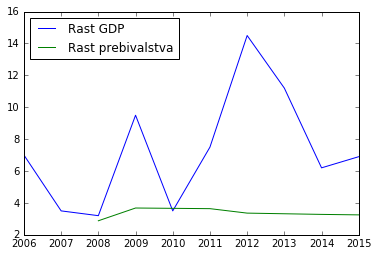

In [25]:
niger[['Rast GDP', 'Rast prebivalstva']].plot()

In [21]:
slovenija = pd.concat([GDP.loc['Slovenia'], 
                       GDP_rast.loc['Slovenia'], 
                       populacija_rast.loc['Slovenia'],
                       populacija.loc['Slovenia']
                      ], axis=1) 
slovenija.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
slovenija.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,-0.339688,-0.040091,-0.563482
Rast GDP,-0.339688,1.000000,0.573139,0.606669
Rast prebivalstva,-0.040091,0.573139,1.000000,0.989322
Prebivalstvo,-0.563482,0.606669,0.989322,1.000000


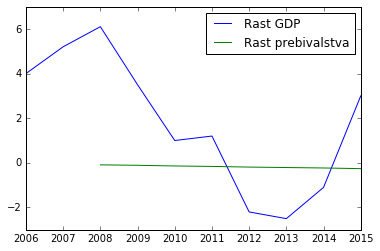

In [26]:
slovenija[['Rast GDP', 'Rast prebivalstva']].plot()

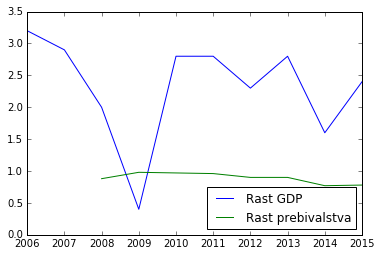

In [30]:
ZDA[['Rast GDP', 'Rast prebivalstva']].plot()

In [22]:
ZDA = pd.concat([GDP.loc['United States'], 
                 GDP_rast.loc['United States'], 
                 populacija_rast.loc['United States'],
                 populacija.loc['United States']
                  ], axis=1) 
ZDA.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
ZDA.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,-0.277833,-0.785759,0.968048
Rast GDP,-0.277833,1.000000,-0.025126,-0.152015
Rast prebivalstva,-0.785759,-0.025126,1.000000,-0.661380
Prebivalstvo,0.968048,-0.152015,-0.661380,1.000000


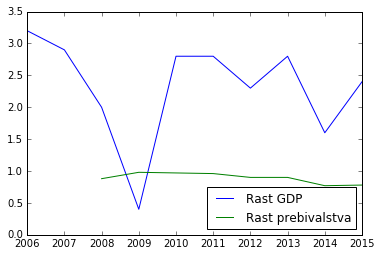

In [27]:
ZDA[['Rast GDP', 'Rast prebivalstva']].plot()

In [24]:
katar = pd.concat([GDP.loc['Qatar'], 
                   GDP_rast.loc['Qatar'], 
                   populacija_rast.loc['Qatar'],
                   populacija.loc['Qatar']
                  ], axis=1) 
katar.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
katar.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,0.478420,-0.454708,0.141275
Rast GDP,0.478420,1.000000,-0.780742,-0.702358
Rast prebivalstva,-0.454708,-0.780742,1.000000,0.912241
Prebivalstvo,0.141275,-0.702358,0.912241,1.000000


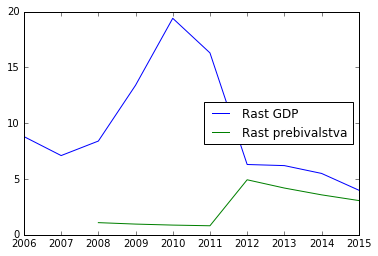

In [28]:
katar[['Rast GDP', 'Rast prebivalstva']].plot()

Poglejmo še, če če korelacija spreminja glede na število prebivalstva držav.

In [34]:
povprecne_stevilo = povprecne.sort_values(by='Populacija')
povprecne_stevilo

,GDP,Rast GDP,Rast populacije,Populacija
drzava,,,,
Niue,5800.000000,6.200000,-0.030000,1.404300e+03
Montserrat,5440.000000,0.800000,0.436250,6.022000e+03
Nauru,5980.000000,8.000000,0.877500,1.110330e+04
Tuvalu,2490.000000,1.630000,0.960000,1.123360e+04
Cook Islands,9100.000000,0.100000,-3.131429,1.310870e+04
Anguilla,10840.000000,-1.020000,2.167500,1.492390e+04
Palau,9030.000000,5.242857,0.475000,2.097360e+04
British Virgin Islands,39640.000000,0.610000,2.095000,2.746980e+04
Gibraltar,38560.000000,5.962500,0.225000,2.863520e+04


In [29]:
kitajska = pd.concat([GDP.loc['China'], 
                 GDP_rast.loc['China'], 
                 populacija_rast.loc['China'],
                 populacija.loc['China']
                  ], axis=1) 
kitajska.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
kitajska.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,-0.767602,-0.777901,0.804024
Rast GDP,-0.767602,1.000000,0.600223,-0.823107
Rast prebivalstva,-0.777901,0.600223,1.000000,-0.591873
Prebivalstvo,0.804024,-0.823107,-0.591873,1.000000


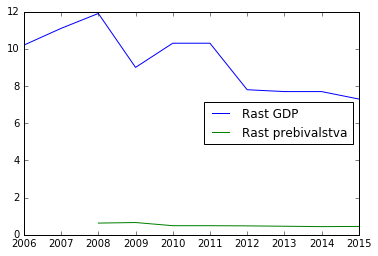

In [35]:
kitajska[['Rast GDP', 'Rast prebivalstva']].plot()

In [36]:
indija = pd.concat([GDP.loc['India'], 
                 GDP_rast.loc['India'], 
                 populacija_rast.loc['India'],
                 populacija.loc['India']
                  ], axis=1) 
indija.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
indija.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,-0.258908,-0.819551,0.642938
Rast GDP,-0.258908,1.000000,0.502155,-0.613983
Rast prebivalstva,-0.819551,0.502155,1.000000,-0.924039
Prebivalstvo,0.642938,-0.613983,-0.924039,1.000000


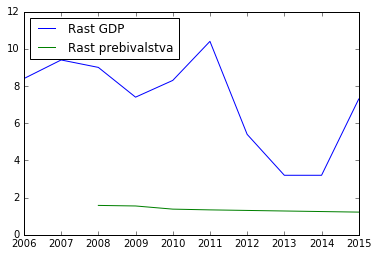

In [37]:
indija[['Rast GDP', 'Rast prebivalstva']].plot()

In [40]:
indonezija = pd.concat([GDP.loc['Indonesia'], 
                 GDP_rast.loc['Indonesia'], 
                 populacija_rast.loc['Indonesia'],
                 populacija.loc['Indonesia']
                  ], axis=1) 
indonezija.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
indonezija.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,-0.668616,-0.739886,0.696376
Rast GDP,-0.668616,1.000000,0.789370,-0.457152
Rast prebivalstva,-0.739886,0.789370,1.000000,-0.999278
Prebivalstvo,0.696376,-0.457152,-0.999278,1.000000


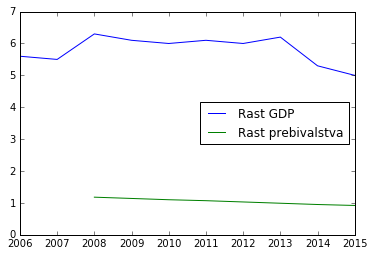

In [42]:
indonezija[['Rast GDP', 'Rast prebivalstva']].plot()

In [38]:
niue = pd.concat([GDP.loc['Niue'], 
                 GDP_rast.loc['Niue'], 
                 populacija_rast.loc['Niue'],
                 populacija.loc['Niue']
                  ], axis=1) 
niue.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
niue.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,NaN,NaN,NaN,NaN
Rast GDP,NaN,1.000000e+00,NaN,7.301959e-16
Rast prebivalstva,NaN,NaN,NaN,NaN
Prebivalstvo,NaN,7.301959e-16,NaN,1.000000e+00


In [39]:
montserrat = pd.concat([GDP.loc['Montserrat'], 
                 GDP_rast.loc['Montserrat'], 
                 populacija_rast.loc['Montserrat'],
                 populacija.loc['Montserrat']
                  ], axis=1) 
montserrat.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
montserrat.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.000000,1.000000,0.827170,-0.385988
Rast GDP,1.000000,1.000000,0.827170,-0.385988
Rast prebivalstva,0.827170,0.827170,1.000000,0.910907
Prebivalstvo,-0.385988,-0.385988,0.910907,1.000000


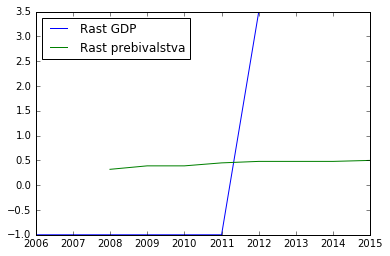

In [43]:
montserrat[['Rast GDP', 'Rast prebivalstva']].plot()

In [41]:
nauru = pd.concat([GDP.loc['Nauru'], 
                 GDP_rast.loc['Nauru'], 
                 populacija_rast.loc['Nauru'],
                 populacija.loc['Nauru']
                  ], axis=1) 
nauru.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva', 'Prebivalstvo']
nauru.corr()

,GDP,Rast GDP,Rast prebivalstva,Prebivalstvo
GDP,1.00000,NaN,-0.242750,-0.249500
Rast GDP,NaN,NaN,NaN,NaN
Rast prebivalstva,-0.24275,NaN,1.000000,0.996198
Prebivalstvo,-0.24950,NaN,0.996198,1.000000


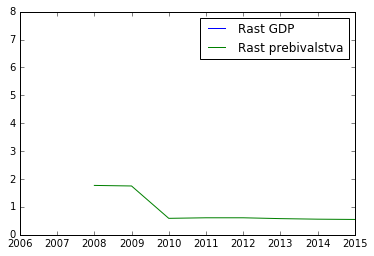

In [44]:
nauru[['Rast GDP', 'Rast prebivalstva']].plot()